In [47]:
import pandas as pd
from vanna.remote import VannaDefault
import duckdb

In [48]:
import os
from dotenv import load_dotenv
load_dotenv()


True

In [49]:
API_KEY = os.getenv("API_KEY")
MODEL_NAME = os.getenv("MODEL_NAME")
vn = VannaDefault(api_key=API_KEY, model=MODEL_NAME)

In [50]:
vn.connect_to_duckdb("../files/ads.duckdb")

True


In [51]:
vn.train(ddl=
         """
         CREATE TABLE ads_data (
        date DATE,
        platform VARCHAR(100),
        account VARCHAR(150),
        campaign VARCHAR(200),
        country VARCHAR(50),
        device VARCHAR(100),
        spend NUMERIC(12,2),
        clicks INT,
        impressions INT,
        conversions INT,
        load_date TIMESTAMP,
        source_file_name VARCHAR(255),
        record_id VARCHAR(50)
    );
            """
    
)

Adding ddl: 
         CREATE TABLE ads_data (
        date DATE,
        platform VARCHAR(100),
        account VARCHAR(150),
        campaign VARCHAR(200),
        country VARCHAR(50),
        device VARCHAR(100),
        spend NUMERIC(12,2),
        clicks INT,
        impressions INT,
        conversions INT,
        load_date TIMESTAMP,
        source_file_name VARCHAR(255),
        record_id VARCHAR(50)
    );
            


'18225185-ddl'

In [52]:
vn.train(ddl=
         """
    CREATE VIEW cac AS
SELECT
    date,
    platform,
    account,
    campaign,
    country,
    device,
    spend,
    clicks,
    impressions,
    conversions,
    load_date,
    source_file_name,
    record_id,
    CASE WHEN conversions > 0 THEN spend / conversions ELSE NULL END AS cac
FROM base_ads;

    """
)

Adding ddl: 
    CREATE VIEW cac AS
SELECT
    date,
    platform,
    account,
    campaign,
    country,
    device,
    spend,
    clicks,
    impressions,
    conversions,
    load_date,
    source_file_name,
    record_id,
    CASE WHEN conversions > 0 THEN spend / conversions ELSE NULL END AS cac
FROM base_ads;

    


'18225186-ddl'

In [53]:
vn.train(ddl=
    """
    CREATE VIEW compare_last_30_days AS
SELECT
    metric VARCHAR(10),
    last_30_value NUMERIC,
    prev_30_value NUMERIC,
    delta_abs NUMERIC,
    delta_pct NUMERIC
;

    """
    
)

Adding ddl: 
    CREATE VIEW compare_last_30_days AS
SELECT
    metric VARCHAR(10),
    last_30_value NUMERIC,
    prev_30_value NUMERIC,
    delta_abs NUMERIC,
    delta_pct NUMERIC
;

    


'18225187-ddl'

In [54]:
vn.train(ddl=
    """
CREATE VIEW compare_n_days AS
SELECT
    metric VARCHAR(10),
    last_value NUMERIC,
    prev_value NUMERIC,
    delta_abs NUMERIC,
    delta_pct NUMERIC
;


    """
    
)

Adding ddl: 
CREATE VIEW compare_n_days AS
SELECT
    metric VARCHAR(10),
    last_value NUMERIC,
    prev_value NUMERIC,
    delta_abs NUMERIC,
    delta_pct NUMERIC
;


    


'18225188-ddl'

In [55]:
vn.train(ddl="""
         CREATE VIEW roas AS
SELECT
    date DATE,
    platform VARCHAR(100),
    account VARCHAR(150),
    campaign VARCHAR(200),
    country VARCHAR(50),
    device VARCHAR(100),
    spend NUMERIC(12,2),
    clicks INT,
    impressions INT,
    conversions INT,
    load_date TIMESTAMP,
    source_file_name VARCHAR(255),
    record_id VARCHAR(50),
    conversions * 100 AS revenue,
    CASE WHEN spend > 0 THEN (conversions * 100.0) / spend ELSE NULL END AS roas
FROM base_ads;
    """
    
)

Adding ddl: 
         CREATE VIEW roas AS
SELECT
    date DATE,
    platform VARCHAR(100),
    account VARCHAR(150),
    campaign VARCHAR(200),
    country VARCHAR(50),
    device VARCHAR(100),
    spend NUMERIC(12,2),
    clicks INT,
    impressions INT,
    conversions INT,
    load_date TIMESTAMP,
    source_file_name VARCHAR(255),
    record_id VARCHAR(50),
    conversions * 100 AS revenue,
    CASE WHEN spend > 0 THEN (conversions * 100.0) / spend ELSE NULL END AS roas
FROM base_ads;
    


'18225189-ddl'

SQL Prompt: [{'role': 'system', 'content': "You are a DuckDB SQL expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \n\n         CREATE VIEW roas AS\nSELECT\n    date DATE,\n    platform VARCHAR(100),\n    account VARCHAR(150),\n    campaign VARCHAR(200),\n    country VARCHAR(50),\n    device VARCHAR(100),\n    spend NUMERIC(12,2),\n    clicks INT,\n    impressions INT,\n    conversions INT,\n    load_date TIMESTAMP,\n    source_file_name VARCHAR(255),\n    record_id VARCHAR(50),\n    conversions * 100 AS revenue,\n    CASE WHEN spend > 0 THEN (conversions * 100.0) / spend ELSE NULL END AS roas\nFROM base_ads;\n    \n\n\n         CREATE VIEW roas AS\nSELECT\n    date DATE,\n    platform VARCHAR(100),\n    account VARCHAR(150),\n    campaign VARCHAR(200),\n    country VARCHAR(50),\n    device VARCHAR(100),\n    spend NUMERIC(12,2),\n    clicks 

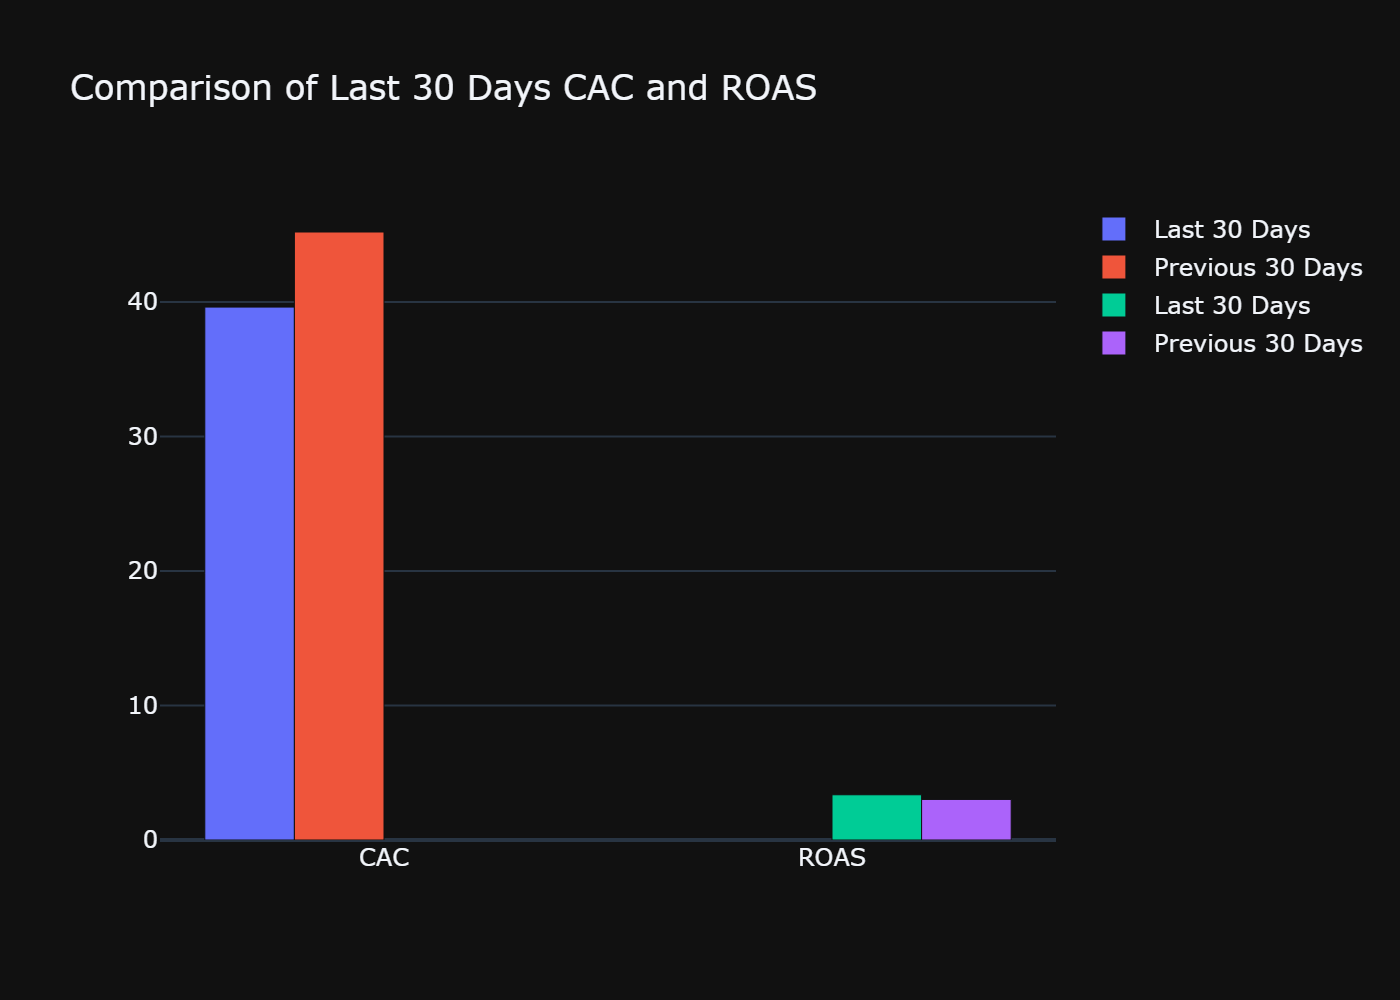

('SELECT * FROM compare_last_30_days;',   metric  last_30_value  prev_30_value  delta_abs  delta_pct
0    CAC      39.626165      45.211345  -5.585180 -12.353492
1   ROAS       3.362813       3.015709   0.347104  11.509856, Figure({
    'data': [{'name': 'Last 30 Days', 'type': 'bar', 'x': ['CAC'], 'y': [39.626164707165536]},
             {'name': 'Previous 30 Days', 'type': 'bar', 'x': ['CAC'], 'y': [45.21134479429181]},
             {'name': 'Last 30 Days', 'type': 'bar', 'x': ['ROAS'], 'y': [3.3628126535527074]},
             {'name': 'Previous 30 Days', 'type': 'bar', 'x': ['ROAS'], 'y': [3.0157088904262768]}],
    'layout': {'barmode': 'group', 'template': '...', 'title': {'text': 'Comparison of Last 30 Days CAC and ROAS'}}
}))


In [56]:
sql = vn.ask("Dame los resultados de la vista  de la comparcionde 30 dias CAC y ROAS")
print(sql)
